In [10]:
import pandas as pd


In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [12]:
### load dataset into pandas dataframe
df = pd.read_csv (url , names = [ 'sepal length' , 'sepal width' , 'petal length' , 'petal width' , 'target'])

In [13]:
# Data standardization Section
from sklearn.preprocessing import StandardScaler
features = [ 'sepal length' , 'sepal width' , 'petal length' , 'petal width']

In [14]:
# Seperating out features
x = df.loc[ : , features].values
# Seperating out the target
y = df.loc[ : , ['target']].values
# Stanadardizing the features
x = StandardScaler().fit_transform(x)

In [28]:
from sklearn.decomposition import PCA 
pca = PCA (n_components =2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1' , 'principal component 2'])

In [31]:
finalDf = pd.concat([principalDf , df[['target']]] , axis =1)
finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: target, Length: 150, dtype: bool

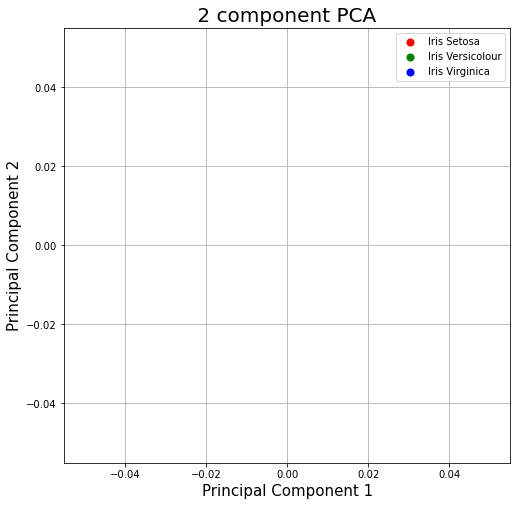

In [37]:
# Visualise 2d graph
import matplotlib.pyplot as plt
fig = plt.figure( figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1' , fontsize = 15)
ax.set_ylabel('Principal Component 2' , fontsize = 15)
ax.set_title(' 2 component PCA ' , fontsize = 20)
targets = [ 'Iris Setosa' , 'Iris Versicolour' , 'Iris Virginica']
colors = ['r','g','b']
for target,color in zip(targets , colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter( finalDf.loc[indicesToKeep , 'principal component 1'],
                finalDf.loc[indicesToKeep , 'principal component 2'],
               c = color, 
               s = 50)


ax.legend(targets)
ax.grid()
indicesToKeep